In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

%matplotlib inline
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [2]:
data =  pd.read_csv('subscribers (2).csv')


data.shape

(227628, 31)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [4]:
data.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [5]:
def churn(rows):
    if row.payment_period== 0 and row.current_sub_TF==False:
        return 1
    elif row.payment_period== 0 and pd.notna(row.cancel_date):
        return 1
    elif row.payment_period>=1:
        return 0
    else:
        return ''
    
data["label"] = np.zeros(data.shape[0])
data.loc[(data["payment_period"] == 0) & (data["current_sub_TF"] == False), "label"] = 1
data.loc[(data["payment_period"] == 0) & pd.notna(data['cancel_date']), "label"] = 1

In [6]:
np.mean(data["label"] == 0), np.mean(data["label"] == 1)

(0.6158776600418226, 0.38412233995817735)

In [7]:
select_data = data[["num_weekly_services_utilized", "preferred_genre", "weekly_consumption_hour", "num_ideal_streaming_services", "age", "male_TF", "months_per_bill_period", "monthly_price", "discount_price", "join_fee", "num_trial_days", "label"]]

In [8]:
select_data.shape

(227628, 12)

In [9]:
data.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,label
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True,0.0
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,0.0
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1.0
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,ar,NaN,14,False,0,NaN,NaN,NaN,True,1.0
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,0.0


In [10]:
select_data.dropna(inplace=True)

In [11]:
select_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93153 entries, 2 to 227624
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_weekly_services_utilized  93153 non-null  float64
 1   preferred_genre               93153 non-null  object 
 2   weekly_consumption_hour       93153 non-null  float64
 3   num_ideal_streaming_services  93153 non-null  float64
 4   age                           93153 non-null  float64
 5   male_TF                       93153 non-null  object 
 6   months_per_bill_period        93153 non-null  int64  
 7   monthly_price                 93153 non-null  float64
 8   discount_price                93153 non-null  float64
 9   join_fee                      93153 non-null  float64
 10  num_trial_days                93153 non-null  int64  
 11  label                         93153 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 9.2+ MB


In [12]:
select_data = pd.get_dummies(select_data)

In [13]:
select_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93153 entries, 2 to 227624
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   num_weekly_services_utilized   93153 non-null  float64
 1   weekly_consumption_hour        93153 non-null  float64
 2   num_ideal_streaming_services   93153 non-null  float64
 3   age                            93153 non-null  float64
 4   months_per_bill_period         93153 non-null  int64  
 5   monthly_price                  93153 non-null  float64
 6   discount_price                 93153 non-null  float64
 7   join_fee                       93153 non-null  float64
 8   num_trial_days                 93153 non-null  int64  
 9   label                          93153 non-null  float64
 10  preferred_genre_comedy         93153 non-null  uint8  
 11  preferred_genre_drama          93153 non-null  uint8  
 12  preferred_genre_international  93153 non-null

In [14]:
X_colnames = select_data.columns.tolist()
X_colnames.remove("label")
X, y = select_data[X_colnames], select_data["label"]


X1_train, X1_val, y1_train, y1_val = train_test_split(X.values, y.values, test_size=0.3, random_state=114)
X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape

((65207, 16), (65207,), (27946, 16), (27946,))

In [15]:
np.mean(y1_train == 0), np.mean(y1_train == 1)

(0.6819819957979971, 0.3180180042020029)

In [16]:
lr_clf1 = LogisticRegression(class_weight={0: 0.32, 1: 0.68})
lr_clf1.fit(X1_train, y1_train)

y1_val_pred = lr_clf1.predict(X1_val)
print("Confusion matrix (validation):\n {0}\n".format(confusion_matrix(y1_val, y1_val_pred)))
print("Classification report (validation):\n {0}".format(classification_report(y1_val, y1_val_pred)))

Confusion matrix (validation):
 [[12640  6331]
 [ 2569  6406]]

Classification report (validation):
               precision    recall  f1-score   support

         0.0       0.83      0.67      0.74     18971
         1.0       0.50      0.71      0.59      8975

    accuracy                           0.68     27946
   macro avg       0.67      0.69      0.66     27946
weighted avg       0.73      0.68      0.69     27946



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [17]:
y1_valid_score_lr1 = lr_clf1.predict_proba(X1_val)
fpr_lr1, tpr_lr1, thresholds_lr1 = roc_curve(y1_val, y1_valid_score_lr1[:, 1])
roc_auc_lr1 = auc(fpr_lr1, tpr_lr1)
roc_auc_lr1

0.7526130118848753

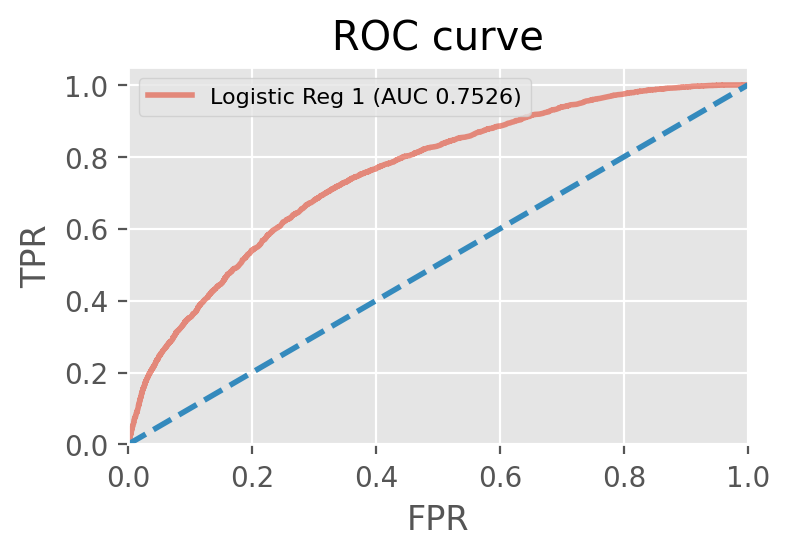

In [18]:
plt.figure(figsize=(4, 2.5), dpi=200)
plt.plot(fpr_lr1, tpr_lr1, lw=2, alpha=.6)
plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.legend(["Logistic Reg 1 (AUC {:.4f})".format(roc_auc_lr1)], fontsize=8, loc=2)
plt.show()

In [19]:
select_data.columns

Index(['num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'months_per_bill_period',
       'monthly_price', 'discount_price', 'join_fee', 'num_trial_days',
       'label', 'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'male_TF_False', 'male_TF_True'],
      dtype='object')

In [20]:
lr_clf1.coef_

array([[-1.04957753e+00, -5.05797615e-02, -1.45775925e-01,
        -6.45289322e-07,  8.47734143e-02,  1.00861523e-01,
         9.63397429e-02,  7.78064986e-02,  2.96706950e-01,
        -1.02658859e+00,  5.43120424e-01,  1.08741509e-01,
         2.75753618e-01,  1.20166391e-01, -3.43340232e-01,
         3.64533586e-01]])

In [21]:
lr_clf1.intercept_

array([0.02120784])

In [30]:
data =  pd.read_csv('subscribers (2).csv')


data.shape

(227628, 31)

In [31]:
def churn(rows):
    if row.payment_period== 0 and row.current_sub_TF==False:
        return 1
    elif row.payment_period== 0 and pd.notna(row.cancel_date):
        return 1
    elif row.payment_period>=1:
        return 0
    else:
        return ''
    
data["label"] = np.zeros(data.shape[0])
data.loc[(data["payment_period"] == 0) & (data["current_sub_TF"] == False), "label"] = 1
data.loc[(data["payment_period"] == 0) & pd.notna(data['cancel_date']), "label"] = 1

In [32]:
select_data = data[["num_weekly_services_utilized", "preferred_genre", "weekly_consumption_hour", "num_ideal_streaming_services", "age", "male_TF", "months_per_bill_period", "monthly_price", "discount_price", "join_fee", "num_trial_days", "label"]]

In [33]:
select_data.dropna(inplace=True)
select_data = pd.get_dummies(select_data)

In [34]:
X_colnames = select_data.columns.tolist()
X_colnames.remove("label")
X, y = select_data[X_colnames], select_data["label"]


In [36]:
lr_clf1 = LogisticRegression(class_weight={0: 0.32, 1: 0.68})
lr_clf1.fit(X,y )

y_pred = lr_clf1.predict(X)

In [37]:
probs = lr_clf1.predict_proba(X)

In [38]:
preds = probs[:,1]

In [41]:
select_data ['preds'] = preds

In [42]:
select_data.to_csv('preds.csv')